<a href="https://colab.research.google.com/github/naga8199/CMPE257-Fall23-NagaLakshmi-Nagubandi/blob/class-activities/PLA%26POCKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
class Perceptron:
    def __init__(self, number_features, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(num_features + 1)

    def predictWeights(self, inputs):
        # Calculating weights
        weight_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]

        return 1 if weight_sum >= 0 else -1

    def train(self, training_data, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predictWeights(inputs)
                # Updating weights to correct the mistake
                updatedWeights = self.learning_rate * (label - prediction)
                self.weights[1:] += updatedWeights * inputs
                self.weights[0] += updatedWeights

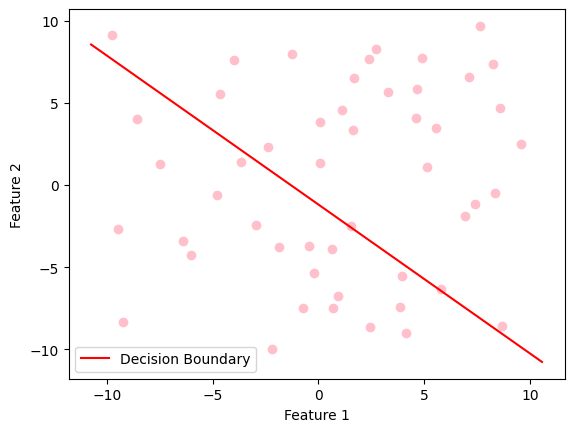

In [17]:
if __name__ == "__main__":
    # Reading the data sets
    df = pd.read_csv("/content/synthetic_dataset (1).csv")

    # Extracting features and lables
    X = df.iloc[:, :-1].values #extracting all columns except the last one
    y = df.iloc[:, -1].values  #extracting the last column

    # Initializing and training the perceptron
    num_features = X.shape[1]
    perceptron = Perceptron(num_features)
    perceptron.train(X, y)

    # Creating  scatter plot for the data
    plt.scatter(X[:, 0], X[:, 1], c='pink')

    # Ploting the decision boundary
    x = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
    y = (-perceptron.weights[1] * x - perceptron.weights[0]) / perceptron.weights[2]
    plt.plot(x, y, '-r', label='Decision Boundary')

    # Customize plot
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')


    plt.show()

Pocket Algorithm

In [4]:
class PocketAlgorithm:
    def __init__(self, num_features, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = np.zeros(num_features + 1)  # +1 for the bias term
        self.best_weights = self.weights.copy()
        self.best_accuracy = 0.0

    def predict(self, inputs):
        # Compute the weighted sum of inputs
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # Apply the step function as the activation function
        return 1 if weighted_sum >= 0 else -1

    def accuracy(self, test_data, test_labels):
        correct = 0
        for inputs, label in zip(test_data, test_labels):
            prediction = self.predict(inputs)
            if prediction == label:
                correct += 1
        return correct / len(test_data)

    def train(self, training_data, labels, test_data=None, test_labels=None):
        for epoch in range(self.max_epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                if prediction != label:
                    update = self.learning_rate * (label - prediction)
                    self.weights[1:] += update * inputs
                    self.weights[0] += update

                    # Check if the new weights perform better on test data
                    if test_data is not None and test_labels is not None:
                        current_accuracy = self.accuracy(test_data, test_labels)
                        if current_accuracy > self.best_accuracy:
                            self.best_weights = self.weights.copy()
                            self.best_accuracy = current_accuracy

Test Accuracy: 0.8666666666666667


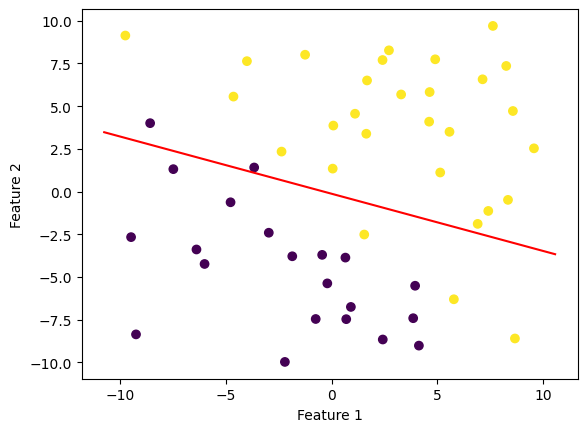

In [23]:
if __name__ == "__main__":

    df = pd.read_csv("/content/synthetic_dataset (1).csv")

    # Extracting features and labels
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Split the data into training and test sets
    split_ratio = 0.7
    split_index = int(len(X) * split_ratio)

    train_data = X[:split_index]
    train_labels = y[:split_index]
    test_data = X[split_index:]
    test_labels = y[split_index:]


    num_features = train_data.shape[1]
    pocket_algorithm = PocketAlgorithm(num_features)
    pocket_algorithm.train(train_data, train_labels, test_data, test_labels)


    test_accuracy = pocket_algorithm.accuracy(test_data, test_labels)
    print(f"Test Accuracy: {test_accuracy}")


    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')


    x = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
    y = (-pocket_algorithm.best_weights[1] * x - pocket_algorithm.best_weights[0]) / pocket_algorithm.best_weights[2]
    plt.plot(x, y, '-r', label='Decision Boundary')


    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')



    plt.show()